In [386]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [387]:
%matplotlib inline

In [502]:
image = np.flipud(plt.imread('../FourierWindowMethodMATLAB/ExamplePattern2.tiff'))
image[image != 0] = 1
image = image[31:-31, 31:-31]
TI = image.copy()[:20, 100:120]

In [504]:
TI = np.ones((20, 20))
TI[:, ::2]  = 0


In [505]:
import scipy.io as sio

In [506]:
rot = sio.loadmat('../FourierWindowMethodMATLAB/dir.txt')['dir']
rot = rot[31:-31, 31:-31]*180./np.pi

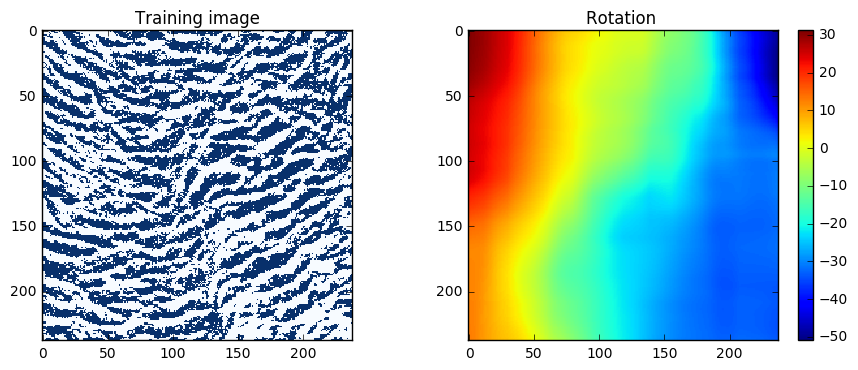

In [507]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(image,
           cmap='Blues', interpolation='none')
plt.title('Training image')

plt.subplot(122)
plt.imshow((rot - np.mean(rot[:20, 100:120])), interpolation='none')
plt.colorbar()
plt.title('Rotation ')


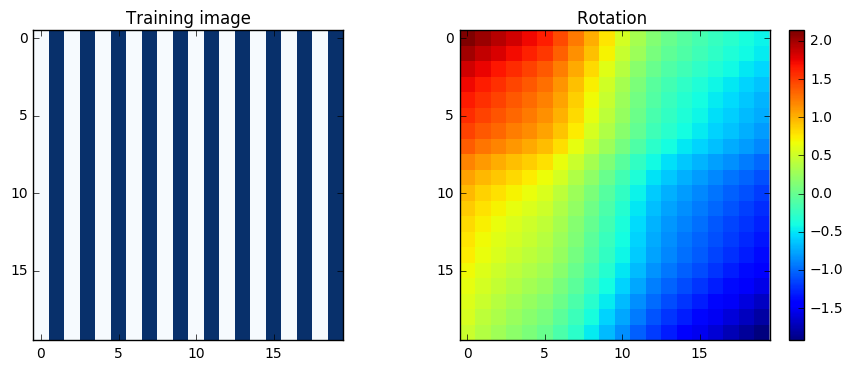

In [508]:

plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.imshow(TI,
           cmap='Blues', interpolation='none')
plt.title('Training image')


plt.subplot(122)
plt.imshow(rot[:20, 100:120] - np.mean(rot[:20, 100:120]), interpolation='none')
plt.colorbar()
plt.title('Rotation ')



In [509]:
rot = (rot - np.mean(rot[:20, 100:120]))

In [510]:
rot[:, 120:] = 0
rot[:, :120] = 90.

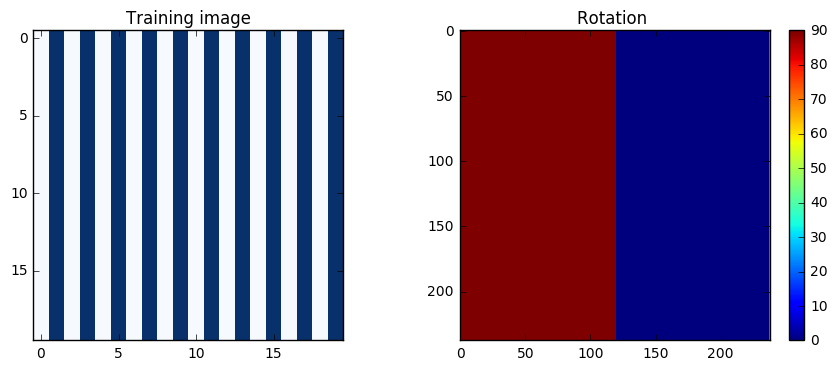

In [511]:

plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.imshow(TI,
           cmap='Blues', interpolation='none')
plt.title('Training image')


plt.subplot(122)
plt.imshow(rot , interpolation='none')
plt.colorbar()
plt.title('Rotation ')



In [517]:
Nx = TI.shape[1]
Ny = TI.shape[0]

In [518]:
f = open("ti.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(Nx, Ny))
f.write('1\n')
f.write('veg\n')
count = 0

for i in range(Nx):
    for j in range(Ny):
        f.write('{}\n'.format(str(TI[j,i])))
        count+= 1

In [519]:
rot.shape[0]

238

In [495]:
f = open("rot.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(rot.shape[0]-2, rot.shape[1]-2))
f.write('1\n')
f.write('veg\n')
count = 0
for i in range(rot.shape[1]):
    for j in range(rot.shape[0]):
        f.write('{}\n'.format(str(rot[j,i])))
        count += 1
        

In [487]:
count/238.

238.0

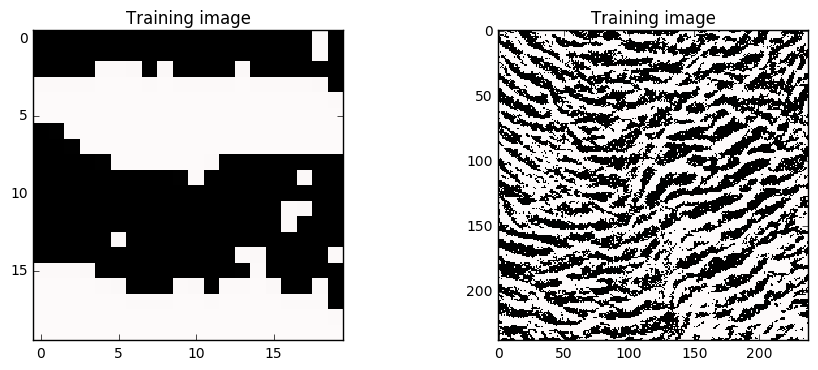

In [488]:
# 1. DEM of the hillslope (HillslopeDEM.tif).

plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(TI,
           cmap='gist_earth_r', interpolation='none')
plt.title('Training image')
plt.subplot(122)
plt.imshow(image,
           cmap='gist_earth_r', interpolation='none')
plt.title('Training image')
        
# 2.  A slope inclination layer (Dem_Slope.tif)


In [490]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

veg_real00000 veg_real00000

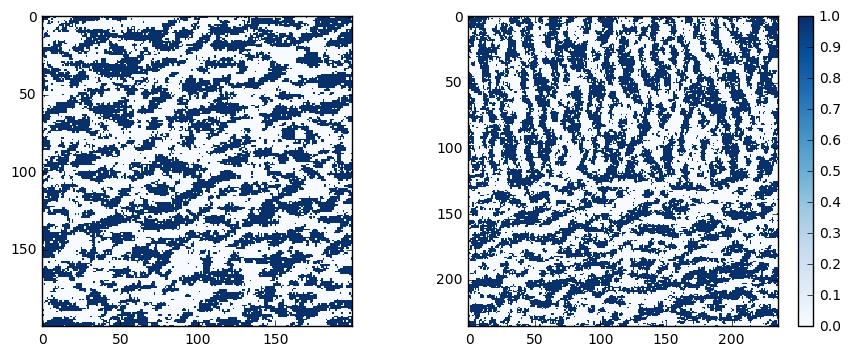

In [491]:
rot_test_small, nx,ny = openfile("rotated/test_real00000.gslib")
test_small, nx,ny = openfile("output/test_real00000.gslib")


fig = plt.figure(figsize = (11, 4))
plt.subplot(121)

# plt.imshow(TI[31:-31, 31:-31], cmap = 'Blues', interpolation  = 'none')
plt.imshow(test_small, cmap = 'Blues', interpolation  = 'none')

plt.subplot(122)
plt.imshow(rot_test_small,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()


veg_real00000 veg_real00000

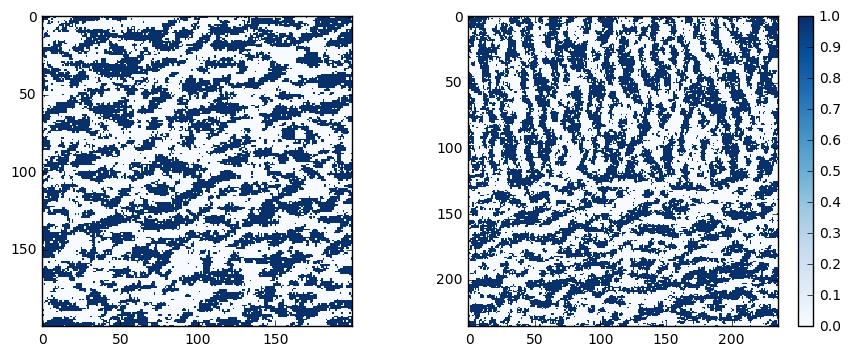

In [492]:
rot_test, nx,ny = openfile("rotated/test_real00000.gslib")
test, nx,ny = openfile("output/test_real00000.gslib")

fig = plt.figure(figsize = (11, 4))
plt.subplot(121)

# plt.imshow(TI[31:-31, 31:-31], cmap = 'Blues', interpolation  = 'none')
plt.imshow(test, cmap = 'Blues', interpolation  = 'none')

plt.subplot(122)
plt.imshow(rot_test,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()
